In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import re

#Fonction pour trouver les codes correspondants à un pays entre les codes de pays et le nom des pays :"
def refresh_dico ():
    dic = {}
    for i in df1[['Country Name','Country Code']].dropna().drop_duplicates().iterrows() :
        dic[i[1]['Country Name']] = i[1]['Country Code']
    return (dic)
    

#fonction pour trouver toutes les lignes qui correspondent à un pays où à une variable en particulier

def rech_ligne_pays (y,df) :
    expression = re.compile(dic_pays[y]+".*?;")
    return(list(i[:-1] for i in (expression.findall(';'.join(df.index)+';'))))

def rech_ligne_indic (y,df):
    expression = re.compile(".{,4}"+y+";")
    return(list(i[:-1] for i in (expression.findall(';'.join(df.index)+';'))))

def graph_regress(nom_pays) :
    sns.lmplot(x=dic_pays(nom_pays)+"_GDP growth (annual %)", y=dic_pays(nom_pays)+"_croissance émissions GES (pourcent)", data=df1.drop(['Country Name','Country Code','Indicator Name'], axis = 1).loc[[dic_pays(nom_pays)+'_GDP growth (annual %)',dic_pays(nom_pays)+'_croissance émissions GES (pourcent)']].dropna(axis = 1).T)

#/!\ il faut entre le nom avec des caractères regex pour les ( et %)
        

On construit un dictionnaire nom du pays / code du pays :

# On va télécharger les bases de données et repérer les variables pertinentes dans chacune des bases

### On commmence par créer les dataframe

Il faut légèrement modifier le fichier csv dézippé pour enlever les deux premières lignes, qui ne comprennent que des infos générales sur le format du fichier mais qui entrainaient un problème d'ouverture via la commande pd.read_csv car elles comportaient des virgules.

On peut ensuite ouvrir sereinement toutes les base modifiées ainsi.

In [79]:
agri_forest = pd.read_csv("chiffre_agri_foret_peche.csv")
augment_pib = pd.read_csv("chiffre_augment_pib.csv")
energie_utilisee = pd.read_csv("chiffre_energie_utilise.csv")
emission_GES = pd.read_csv("chiffre_GES_total.csv")
nucle_total = pd.read_csv('chiffre_nucle_total_nuke_total_fossile.csv')
part_indus_construc = pd.read_csv('chiffre_part_indus_construc.csv')
pib = pd.read_csv("chiffre_pib.csv")
nom_pays = pib['Country Name']


In [80]:
df_list  = [agri_forest, augment_pib, energie_utilisee, emission_GES, nucle_total, part_indus_construc, pib]

### On regarde chaque dataframe pour identifier les variables pertinentes

In [81]:
agri_forest.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
augment_pib.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.369863,4.198232,0.3,5.700001,2.1,1.999999,NaN,NaN,NaN,NaN


In [83]:
energie_utilisee.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
emission_GES.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Émissions totales de GES (kt d’équivalent CO2),EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
nucle_total.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Alternative and nuclear energy (% of total ene...,EG.USE.COMM.CL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
part_indus_construc.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Industry (including construction), value added...",NV.IND.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
pib.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.701676e+09,2.765363e+09,2.919553e+09,2.965922e+09,3.056425e+09,NaN,NaN,NaN,NaN


On observe que tous les df sont construits de la même manière. On a le nom du pays, son abréviation, le nom de l'indicateur utilisé, son code, puis sa valeur pour chaque année. On a aussi toujours une colonne vide, qui ne nous gène pas vraiment.

### On nettoie les bases en enlevant les informations qui ne nous intéresse pas

Il faudra enlever la colomne "unnamed", les colomnes qui correpondent aux années qui ne nous intéresssent pas, et éventuellement les lignes (=pays ou région) que l'on ne garde pas.

Par exemple, conserve-t-on les pays comme Aruba dont on ne connait que le PIB? Je pense que la question elle est vite répondue.

Pareil, est-ce que ça a vraiement un intérêt de garder les zones géographiques du type Asie du Sud-Est, etc?  ce ne sont que des aggrégats de pays, donc pas forcément.

### On fusionne les dataframe pour aggréger tous ces indicateurs

On peut envisager plusieurs manières de fusionner ces df. Soit on a en index Pays_Année et les colomnes correspindent chacune à un indice, soit on a Pays_Indicateur et les colonnes correspondent chacune a une année. Ce sont les formats wide et long (cf tp2).

Pour des raisons de lisibilité, il est évident que l'on va conserver le nom de l'indicateur, et non pas son nom de code. En revanche, il faudra voir à l'usage si on préfère utiler le nom complet des pays ou seulement leur nom de code

In [88]:
#On a ici la syntaxe qui permet de créer une nouvelle colomne en lui domnant le nom que l'on souhaite
pib['Pays_indic'] = pib['Country Code'].str[:3] + '_pib'

In [89]:
#On fait ici la modif sur tous les df à l'aide d'une boucle for, 
#mais ça peut donner des noms de variable un peu long à manipuler
for df in df_list :
    df['Pays_indic'] = df['Country Code'].str[:3] + '_' + df['Indicator Name'].str[:99]
#part_indus_construc['Pays_indic']

On concatène les df, on les trie et on met en index la variable créée à cet effet ci-dessus.

In [90]:
df = pd.concat(df_list)
df = df.sort_values('Pays_indic').set_index('Pays_indic')
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
Pays_indic,,,,,,,,,,,,,,,,,,,,,
"ABW_Agriculture, forestry, and fishing, value added (% of GDP)",Aruba,ABW,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABW_Alternative and nuclear energy (% of total energy use),Aruba,ABW,Alternative and nuclear energy (% of total ene...,EG.USE.COMM.CL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABW_Energy use (kg of oil equivalent per capita),Aruba,ABW,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABW_GDP (current US$),Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.701676e+09,2.765363e+09,2.919553e+09,2.965922e+09,3.056425e+09,NaN,NaN,NaN,NaN
ABW_GDP growth (annual %),Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.369863e+00,4.198232e+00,3.000000e-01,5.700001e+00,2.100000e+00,1.999999e+00,NaN,NaN,NaN,NaN


### Suppression des colonnes et lignes inutiles

On a ici la liste des colonnes que l'on supprimme pour se restreindre aux données qui nous intéressent, sutrement dit à partir de 1980 (je ne sais plsu si on avait dit 1980 ou 1985).

In [91]:
useless_data_list = ['Unnamed: 65', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', 
                   '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '2020']
df = df.drop(useless_data_list, axis = 1)
#df.sample(15)

On va chercher à enlever les lignes qui ne contiennent que peu d'infos (au moins 10 valeurs manquantes)

In [92]:
df1 = df
nan_dict = {}
for i in range(len(df1.index)) :
    nb_nan = df1.iloc[i].isnull().sum()
    if nb_nan >10 :
        nan_dict[list(df.index)[i]] = nb_nan
nan_dict

{'ABW_Agriculture, forestry, and fishing, value added (% of GDP)': 25,
 'ABW_Alternative and nuclear energy (% of total energy use)': 40,
 'ABW_Energy use (kg of oil equivalent per capita)': 40,
 'ABW_Industry (including construction), value added (% of GDP)': 25,
 'ABW_Émissions totales de GES (kt d’équivalent CO2)': 32,
 'AFG_Agriculture, forestry, and fishing, value added (% of GDP)': 22,
 'AFG_Alternative and nuclear energy (% of total energy use)': 40,
 'AFG_Energy use (kg of oil equivalent per capita)': 40,
 'AFG_GDP (current US$)': 20,
 'AFG_GDP growth (annual %)': 23,
 'AFG_Industry (including construction), value added (% of GDP)': 22,
 'AGO_Agriculture, forestry, and fishing, value added (% of GDP)': 16,
 'AGO_Industry (including construction), value added (% of GDP)': 16,
 'ALB_Agriculture, forestry, and fishing, value added (% of GDP)': 16,
 'ALB_Industry (including construction), value added (% of GDP)': 16,
 'AND_Agriculture, forestry, and fishing, value added (% of GDP)'

In [93]:
df1 = df1.drop(index = nan_dict.keys(), axis = 0)
df1.shape

(1259, 43)

En faisant cela, on supprme environ 600 lignes. Pour le rafiner, il faudrait voir si l'on ne doit pas supprimer toutes les données d'un pays lorsque l'on a que des infos sur deux ou trois indicateurs (notamment qi que sur le PIB). On doit pouvoir s'en sortir en supprimant tous les indexs qui commencent par le code du pays détecté de cette manière.

[Adrien]La fonction pour récupérer les indexs des pays où on a moins de 3 indicateurs.

In [163]:
dic_pays = refresh_dico()


TypeError: 'method' object is not subscriptable

In [156]:
for i in dic_pays.keys() :
    if len(rech_ligne_pays(i,df1))<3 :
        df1 = df1.drop(rech_ligne_pays(i,df1))
dic_pays = refresh_dico()
#ancienne fonction que j'ai écrite plus tot (beaucoup plus lente) :

#for i in nom_pays : 
#    compter_nb_indic = df1.apply(lambda x: True if x['Country Name'] == i else False, axis = 1)
#    if len(compter_nb_indic[compter_nb_indic == True].index) <3 :
#        liste_pays_dic[i] = compter_nb_indic[compter_nb_indic == True].index'''


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

On supprime les lignes des pays dont on a trop peu d'indicateurs complet : (servait pourl'ancienne fonction)

In [96]:
#for i in liste_pays_dic.keys():
#    df1 = df1.drop(index = liste_pays_dic[i], axis = 1)

On a supprimer en tout 58 lignes. De plus on va aussi supprimer de la base les aggrégats de pays (ces lignes là sont colinéaires aux autres, ce qui risque de nous poser problème plus tard dans la prédiction). Voilà les régions à supprimer : Upper middle income, Latin America & the Caribbean (IDA & IBRD countries),Middle East & North Africa (IDA & IBRD countries),South Asia (IDA & IBRD), Middle East & North Africa (IDA & IBRD countries), Latin America & the Caribbean (IDA & IBRD countries),East Asia & Pacific (IDA & IBRD countries), Europe & Central Asia (IDA & IBRD countries), Sub-Saharan Africa, Sub-Saharan Africa (excluding high income), Post-demographic dividend, Pre-demographic dividend, OECD members, North America, Middle East & North Africa (excluding high income), Middle East & North Africa,Late-demographic dividend, Lower middle income
Low & middle income,Latin America & Caribbean,Least developed countries: UN classification, Latin America & Caribbean (excluding high income),IBRD only,IDA & IBRD total,IDA total,IDA blend,Heavily indebted poor countries (HIPC),High income, European Union, Fragile and conflict affected situations,East Asia & Pacific (excluding high income)
Early-demographic dividend, East Asia & Pacific, Europe & Central Asia (excluding high income), Europe & Central Asia,Central Europe and the Baltics


à propos des aggrégats (comment ils aggrègent :)

Aggregation Rules

Aggregates are based on the World Bank’s regional and income classification of economies. Because of missing data, aggregates for groups of economies should be treated as approximations of unknown totals or average values. Regional and income group aggregates are based on the largest available set of data. The aggregation rules are intended to yield estimates for a consistent set of economies from one period to the next and for all indicators. Small differences between sums of subgroup aggregates and overall totals and averages may occur because of the approximations used. In addition, compilation errors and data reporting practices may cause discrepancies in theoretically identical aggregates such as world exports and world imports.

Five methods of aggregation are used in the World Development Indicators:

For group and world totals denoted in the tables by a t, missing data are imputed based on the relationship of the sum of available data to the total in the year of the previous estimate. The imputation process works forward and backward from 2010. Missing values in 2010 are imputed using one of several proxy variables for which complete data are available in that year. The imputed value is calculated so that it (or its proxy) bears the same relationship to the total of available data. Imputed values are usually not calculated if missing data account for more than a third of the total in the benchmark year. The variables used as proxies are GNI in U.S. dollars, total population, exports and imports of goods and services in U.S. dollars, and value added in agriculture, industry, manufacturing, and services in U.S. dollars.

Aggregates marked by an s are sums of available data. Missing values are not imputed. Sums are not computed if more than a third of the observations in the series or a proxy for the series are missing in a given year.

Aggregates of ratios are generally calculated as weighted averages of the ratios (indicated by w) using the value of the denominator or, in some cases, another indicator as a weight. The aggregate ratios are based on available data, including data for economies not shown in the main tables. Missing values are assumed to have the same average value as the available data. No aggregate is calculated if missing data account for more than a third of the value of weights in the benchmark year. In a few cases the aggregate ratio may be computed as the ratio of group totals after imputing values for missing data according to the above rules for computing totals.

Aggregate growth rates are generally calculated as a weighted average of growth rates (and indicated by a w). In a few cases growth rates may be computed from time series of group totals. Growth rates are not calculated if more than half the observations in a period are missing. For further discussion of methods of computing growth rates see below.

Aggregates denoted by an m are medians of the values shown in the table. No value is shown if more than half the observations for countries with a population of more than 1 million are missing. Exceptions to the rules occur throughout the book. Depending on the judgment of World Bank analysts, the aggregates may be based on as little as 50 percent of the available data.
In other cases, where missing or excluded values are judged to be small or irrelevant, aggregates are based only on the data shown in the tables.

Du coup en fonction de comment ils ont agrégés les données ça peut être intéressant ou non de les conserver. Notamment ceux pour lesquels ils ont utilisés la 1ère méthode puisqu'elle nous permet d'avoir une approximation des données qui nous manque (après est ce qu'on veut garder des approximations ? Dans tous les cas il faudra voir je pense si nos prédictions sont robustes à leur ajout ou non)

In [171]:
#/!\ il ne faut faire tourner qu'une seule fois cette fonction, sinon on a une KeyError
liste_supression = ["Upper middle income", "Latin America & the Caribbean (IDA & IBRD countries)","Middle East & North Africa (IDA & IBRD countries)","South Asia (IDA & IBRD)","Middle East & North Africa (IDA & IBRD countries)", "Latin America & the Caribbean (IDA & IBRD countries)","East Asia & Pacific (IDA & IBRD countries)","Europe & Central Asia (IDA & IBRD countries)","Sub-Saharan Africa", "Sub-Saharan Africa (excluding high income)","Post-demographic dividend", "Pre-demographic dividend", "OECD members", "North America", "Middle East & North Africa (excluding high income)", "Middle East & North Africa","Late-demographic dividend", "Lower middle income","Low & middle income","Latin America & Caribbean","Least developed countries: UN classification", "Latin America & Caribbean (excluding high income)","IBRD only","IDA & IBRD total","IDA total","IDA blend","Heavily indebted poor countries (HIPC)","High income","European Union", "Fragile and conflict affected situations","East Asia & Pacific (excluding high income)","Early-demographic dividend","East Asia & Pacific","Europe & Central Asia (excluding high income)","Europe & Central Asia","Central Europe and the Baltics"]

for i in liste_supression :
    df1 = df1.drop(labels = rech_ligne_pays(i,df1)) 
dic_pays = refresh_dico()


KeyError: 'Upper middle income'

In [214]:
dic_pays = refresh_dico()
print(dic_pays)

{'Angola': 'AGO', 'Albania': 'ALB', 'Albanie': 'ALB', 'Arab World': 'ARB', 'Le monde arabe': 'ARB', 'United Arab Emirates': 'ARE', 'Émirats arabes unis': 'ARE', 'Argentina': 'ARG', 'Argentine': 'ARG', 'Antigua and Barbuda': 'ATG', 'Antigua-et-Barbuda': 'ATG', 'Australia': 'AUS', 'Australie': 'AUS', 'Austria': 'AUT', 'Autriche': 'AUT', 'Azerbaijan': 'AZE', 'Azerbaïdjan': 'AZE', 'Burundi': 'BDI', 'Belgium': 'BEL', 'Belgique': 'BEL', 'Benin': 'BEN', 'Bénin': 'BEN', 'Burkina Faso': 'BFA', 'Bangladesh': 'BGD', 'Bulgaria': 'BGR', 'Bulgarie': 'BGR', 'Bahrain': 'BHR', 'Bahamas, The': 'BHS', 'Bahamas': 'BHS', 'Belarus': 'BLR', 'Bélarus': 'BLR', 'Belize': 'BLZ', 'Bermuda': 'BMU', 'Bermudes': 'BMU', 'Bolivia': 'BOL', 'Bolivie': 'BOL', 'Brazil': 'BRA', 'Brésil': 'BRA', 'Brunei Darussalam': 'BRN', 'Brunéi Darussalam': 'BRN', 'Bhutan': 'BTN', 'Bhoutan': 'BTN', 'Botswana': 'BWA', 'Central African Republic': 'CAF', 'République centrafricaine': 'CAF', 'Canada': 'CAN', 'Switzerland': 'CHE', 'Suisse': 'C

On a supprimer en tout une centaine de lignes encore. On actualise la liste pour stocker uniquement les noms des pays restants :

# Début des statistiques descriptives :

On créé un vecteur temps pour pouvoir créer des graphiques en fonction du temps facilement.

In [99]:
t = np.linspace(1980,2019,40)

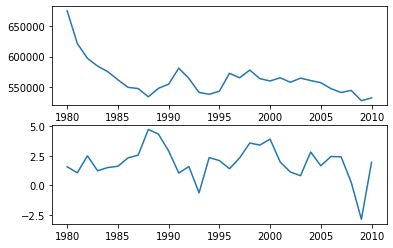

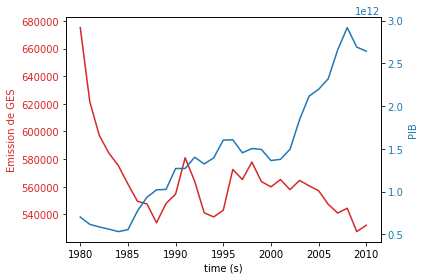

In [100]:
#Sur deux subplots différents
plt.subplot(211)
plt.plot(t[0:31],df1.loc['FRA_Émissions totales de GES (kt d’équivalent CO2)'][2:42].to_numpy()[1:32].T)
plt.subplot(212)
plt.plot(t[0:31],df1.loc['FRA_GDP growth (annual %)'][2:42].to_numpy()[1:32].T)

plt.show()

#Sur le même plot\n",

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Emission de GES', color=color)
ax1.plot(t[0:31], df1.loc['FRA_Émissions totales de GES (kt d’équivalent CO2)'][2:42].to_numpy()[1:32].T, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  #  commence un deuxième axe qui partage le même axe x

color = 'tab:blue'
ax2.set_ylabel('PIB', color=color)  
ax2.plot(t[0:31], df1.loc['FRA_GDP (current US$)'][2:42].to_numpy()[1:32].T, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

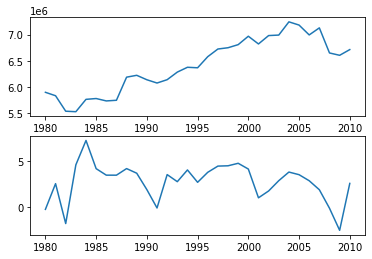

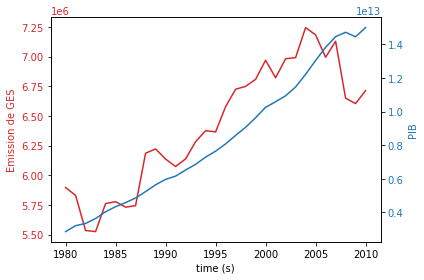

In [101]:
#Sur deux subplots différents
plt.subplot(211)
plt.plot(t[0:31],df1.loc['USA_Émissions totales de GES (kt d’équivalent CO2)'][2:42].to_numpy()[1:32].T)
plt.subplot(212)
plt.plot(t[0:31],df1.loc['USA_GDP growth (annual %)'][2:42].to_numpy()[1:32].T)

plt.show()

#Sur le même plot\n",

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Emission de GES', color=color)
ax1.plot(t[0:31], df1.loc['USA_Émissions totales de GES (kt d’équivalent CO2)'][2:42].to_numpy()[1:32].T, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  #  commence un deuxième axe qui partage le même axe x

color = 'tab:blue'
ax2.set_ylabel('PIB', color=color)  
ax2.plot(t[0:31], df1.loc['USA_GDP (current US$)'][2:42].to_numpy()[1:32].T, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


On va créer un nouvel indicateur qui va nous donner la croissance à l'année des gazs à effet de serre pour chaque pays :

In [126]:
for i in rech_ligne_indic('Émissions totales de GES \(kt d’équivalent CO2\)',df1) :
    df1.loc[i[0:3]+'_croissance émissions GES (kt d’équivalent CO2)'] = df1.loc[i][3:44].astype(np.float64).diff()
    df1.loc[i[0:3]+'_croissance émissions GES (pourcent)'] = df1.loc[i[0:3]+'_croissance émissions GES (kt d’équivalent CO2)']*100 /(df1.loc[i[0:3]+'_Émissions totales de GES (kt d’équivalent CO2)']-df1.loc[i[0:3]+'_croissance émissions GES (kt d’équivalent CO2)'] ) 

In [123]:
rech_ligne_indic('Émissions totales de GES \(kt d’équivalent CO2\)',df1)

['AGO_Émissions totales de GES (kt d’équivalent CO2)',
 'ALB_Émissions totales de GES (kt d’équivalent CO2)',
 'ARB_Émissions totales de GES (kt d’équivalent CO2)',
 'ARE_Émissions totales de GES (kt d’équivalent CO2)',
 'ARG_Émissions totales de GES (kt d’équivalent CO2)',
 'ATG_Émissions totales de GES (kt d’équivalent CO2)',
 'AUS_Émissions totales de GES (kt d’équivalent CO2)',
 'AUT_Émissions totales de GES (kt d’équivalent CO2)',
 'AZE_Émissions totales de GES (kt d’équivalent CO2)',
 'BDI_Émissions totales de GES (kt d’équivalent CO2)',
 'BEL_Émissions totales de GES (kt d’équivalent CO2)',
 'BEN_Émissions totales de GES (kt d’équivalent CO2)',
 'BFA_Émissions totales de GES (kt d’équivalent CO2)',
 'BGD_Émissions totales de GES (kt d’équivalent CO2)',
 'BGR_Émissions totales de GES (kt d’équivalent CO2)',
 'BHS_Émissions totales de GES (kt d’équivalent CO2)',
 'BLR_Émissions totales de GES (kt d’équivalent CO2)',
 'BLZ_Émissions totales de GES (kt d’équivalent CO2)',
 'BMU_Émis

Maintenant qu'on à la croissance des émissions de gazs à effet de serre par an, on peut représenter la croissance du PIB et celle-ci sur le même graphe :

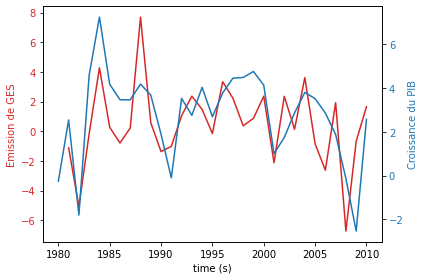

In [103]:
#Sur le même plot,

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Emission de GES', color=color)
ax1.plot(t[0:31], df1.loc['USA_croissance émissions GES (pourcent)'][2:42].to_numpy()[1:32].T, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  #  commence un deuxième axe qui partage le même axe x

color = 'tab:blue'
ax2.set_ylabel('Croissance du PIB', color=color)  
ax2.plot(t[0:31], df1.loc['USA_GDP growth (annual %)'][2:42].to_numpy()[1:32].T, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

On peut voir qu'il y a apparemment une certaine concommitance des courbes, cela-dit il faut faire attention aux effets d'échelles car ici le PIB ne passe presque jamais dans le négatif (ce qui est loin d'être le cas de la croissance des émissions de gaz à effet de serre). On va essayer de le faire dans le cas de la France pour se faire plus d'idées :

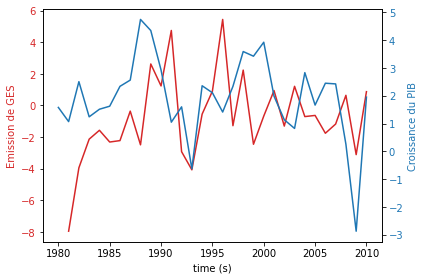

In [104]:
#Sur le même plot,

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Emission de GES', color=color)
ax1.plot(t[0:31], df1.loc['FRA_croissance émissions GES (pourcent)'][2:42].to_numpy()[1:32].T, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  #  commence un deuxième axe qui partage le même axe x

color = 'tab:blue'
ax2.set_ylabel('Croissance du PIB', color=color)  
ax2.plot(t[0:31], df1.loc['FRA_GDP growth (annual %)'][2:42].to_numpy()[1:32].T, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Idée : on pourrait essayer de faire du clustering afin de déterminer la dépendance de la croissance à certains facteurs afin d'essayer de prédire la dépendance de la croissance à l'émission de gaz à effet de serre.

Je vais essayer de régresser le PIB sur l'émission de gaz à effet de serre dans plusieurs pays : la France, Les Etats Unis, La Chine et le Zimbabwe

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics

,Country Name,Country Code,Indicator Name,1980,1981,1982,1983,1984,1985,1986,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Pays_indic,,,,,,,,,,,,,,,,,,,,,
AGO_Alternative and nuclear energy (% of total energy use),Angola,AGO,Alternative and nuclear energy (% of total ene...,1.121397e+00,1.114046e+00,1.197734e+00,1.067446e+00,1.098590e+00,1.208085e+00,1.194329e+00,...,2.250755e+00,2.352302e+00,2.017802e+00,2.546607e+00,2.548840e+00,NaN,NaN,NaN,NaN,NaN
AGO_Energy use (kg of oil equivalent per capita),Angola,AGO,Energy use (kg of oil equivalent per capita),5.470446e+02,5.315891e+02,5.060593e+02,5.019049e+02,4.893271e+02,5.009249e+02,4.891117e+02,...,5.209624e+02,5.217807e+02,5.523636e+02,5.337610e+02,5.446093e+02,NaN,NaN,NaN,NaN,NaN
AGO_GDP (current US$),Angola,AGO,GDP (current US$),5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.553560e+09,7.072063e+09,...,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,9.463542e+10
AGO_GDP growth (annual %),Angola,AGO,GDP growth (annual %),NaN,-4.400001e+00,0.000000e+00,4.200001e+00,6.000002e+00,3.499999e+00,2.900002e+00,...,4.859198e+00,3.471981e+00,8.542147e+00,4.954590e+00,4.822626e+00,9.435756e-01,-2.580097e+00,-1.472074e-01,-2.003577e+00,-8.693938e-01
AGO_Émissions totales de GES (kt d’équivalent CO2),Angola,AGO,Émissions totales de GES (kt d’équivalent CO2),4.800187e+04,4.189479e+04,4.524380e+04,4.485206e+04,3.587830e+04,3.671419e+04,3.598241e+04,...,4.002939e+04,4.087865e+04,4.165716e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALB_Alternative and nuclear energy (% of total energy use),Albania,ALB,Alternative and nuclear energy (% of total ene...,8.259655e+00,9.727010e+00,9.985083e+00,9.675468e+00,7.964705e+00,6.741082e+00,1.198675e+01,...,2.328219e+01,2.210934e+01,2.541917e+01,2.606879e+01,2.454805e+01,NaN,NaN,NaN,NaN,NaN
ALB_Energy use (kg of oil equivalent per capita),Albania,ALB,Energy use (kg of oil equivalent per capita),1.149536e+03,9.892001e+02,9.666833e+02,1.000122e+03,1.018263e+03,9.165552e+02,9.639272e+02,...,7.291544e+02,7.649686e+02,6.878963e+02,8.013300e+02,8.084558e+02,NaN,NaN,NaN,NaN,NaN
ALB_GDP (current US$),Albania,ALB,GDP (current US$),NaN,NaN,NaN,NaN,1.857338e+09,1.897050e+09,2.097326e+09,...,1.192693e+10,1.289077e+10,1.231983e+10,1.277622e+10,1.322814e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.514702e+10,1.527808e+10
ALB_GDP growth (annual %),Albania,ALB,GDP growth (annual %),NaN,5.745635e+00,2.948597e+00,1.104938e+00,-1.251597e+00,1.780644e+00,5.637243e+00,...,3.706892e+00,2.545322e+00,1.417526e+00,1.001987e+00,1.774487e+00,2.218752e+00,3.314805e+00,3.802197e+00,4.071301e+00,2.214063e+00


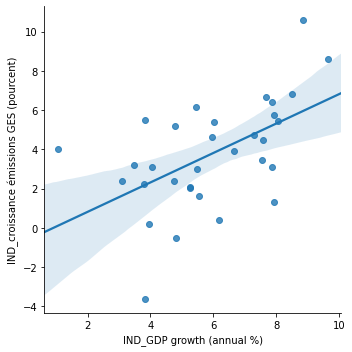

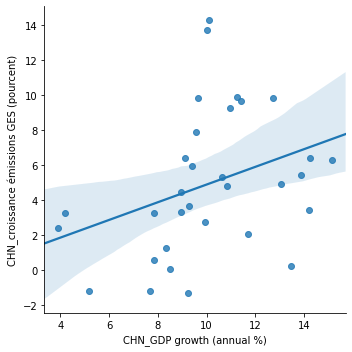

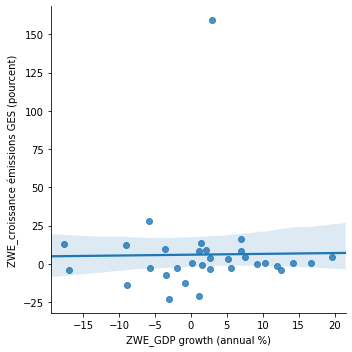

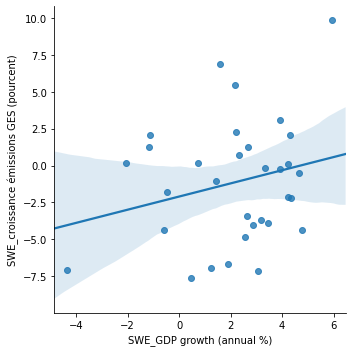

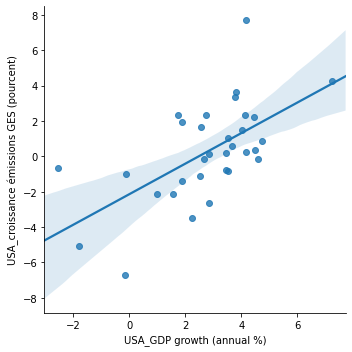

In [146]:
import seaborn as sns
df1.drop(['Country Name','Country Code','Indicator Name'], axis = 1).loc[['CHN_GDP growth (annual %)','CHN_croissance émissions GES (pourcent)']].dropna(axis = 1).head(1200)

for i in ['IND','CHN','ZWE','SWE','USA']:
    sns.lmplot(x=i+"_GDP growth (annual %)", y=i+"_croissance émissions GES (pourcent)", data=df1.drop(['Country Name','Country Code','Indicator Name'], axis = 1).loc[[i+'_GDP growth (annual %)',i+'_croissance émissions GES (pourcent)']].dropna(axis = 1).T)

In [145]:
print(rech_ligne_pays('Zimbabwe',df1))
df1.loc['ZWE_croissance émissions GES (pourcent)'].head(100)
df1.index

['ZWE_Agriculture, forestry, and fishing, value added (% of GDP)', 'ZWE_Alternative and nuclear energy (% of total energy use)', 'ZWE_Energy use (kg of oil equivalent per capita)', 'ZWE_GDP (current US$)', 'ZWE_GDP growth (annual %)', 'ZWE_Industry (including construction), value added (% of GDP)', 'ZWE_Émissions totales de GES (kt d’équivalent CO2)', 'ZWE_croissance émissions GES (kt d’équivalent CO2)', 'ZWE_croissance émissions GES (pourcent)']


Index(['AGO_Alternative and nuclear energy (% of total energy use)',
       'AGO_Energy use (kg of oil equivalent per capita)',
       'AGO_GDP (current US$)', 'AGO_GDP growth (annual %)',
       'AGO_Émissions totales de GES (kt d’équivalent CO2)',
       'ALB_Alternative and nuclear energy (% of total energy use)',
       'ALB_Energy use (kg of oil equivalent per capita)',
       'ALB_GDP (current US$)', 'ALB_GDP growth (annual %)',
       'ALB_Émissions totales de GES (kt d’équivalent CO2)',
       ...
       'WLD_croissance émissions GES (kt d’équivalent CO2)',
       'WLD_croissance émissions GES (pourcent)',
       'WSM_croissance émissions GES (kt d’équivalent CO2)',
       'WSM_croissance émissions GES (pourcent)',
       'YEM_croissance émissions GES (kt d’équivalent CO2)',
       'YEM_croissance émissions GES (pourcent)',
       'ZMB_croissance émissions GES (kt d’équivalent CO2)',
       'ZMB_croissance émissions GES (pourcent)',
       'ZWE_croissance émissions GES (kt d’éq

In [130]:
df1.loc[rech_ligne_pays('Chine',df1)].head(100)

,Country Name,Country Code,Indicator Name,1980,1981,1982,1983,1984,1985,1986,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Pays_indic,,,,,,,,,,,,,,,,,,,,,
"CHN_Agriculture, forestry, and fishing, value added (% of GDP)",China,CHN,"Agriculture, forestry, and fishing, value adde...",2.963394e+01,3.131558e+01,3.278570e+01,3.256812e+01,3.153970e+01,2.793436e+01,2.663850e+01,...,9.325164e+00,9.177662e+00,9.113706e+00,8.942899e+00,8.643488e+00,8.387009e+00,8.057288e+00,7.463560e+00,7.043025e+00,7.111634e+00
CHN_Alternative and nuclear energy (% of total energy use),China,CHN,Alternative and nuclear energy (% of total ene...,8.371075e-01,9.498477e-01,1.045375e+00,1.167013e+00,1.105558e+00,1.149060e+00,1.135353e+00,...,3.509342e+00,3.522435e+00,4.091830e+00,4.534147e+00,5.107017e+00,NaN,NaN,NaN,NaN,NaN
CHN_Energy use (kg of oil equivalent per capita),China,CHN,Energy use (kg of oil equivalent per capita),6.094552e+02,5.971467e+02,6.068304e+02,6.219107e+02,6.510750e+02,6.577597e+02,6.712095e+02,...,1.954723e+03,2.086487e+03,2.155165e+03,2.213759e+03,2.236730e+03,NaN,NaN,NaN,NaN,NaN
CHN_GDP (current US$),China,CHN,GDP (current US$),1.911492e+11,1.958664e+11,2.050897e+11,2.306867e+11,2.599465e+11,3.094880e+11,3.007581e+11,...,6.087165e+12,7.551500e+12,8.532231e+12,9.570406e+12,1.047568e+13,1.106155e+13,1.123328e+13,1.231041e+13,1.389482e+13,1.434290e+13
CHN_GDP growth (annual %),China,CHN,GDP growth (annual %),7.806691e+00,5.172414e+00,8.934426e+00,1.083521e+01,1.513917e+01,1.344340e+01,8.939709e+00,...,1.063614e+01,9.550914e+00,7.859627e+00,7.768615e+00,7.424524e+00,7.041856e+00,6.848728e+00,6.946200e+00,6.751614e+00,6.108561e+00
"CHN_Industry (including construction), value added (% of GDP)",China,CHN,"Industry (including construction), value added...",4.805897e+01,4.597158e+01,4.462180e+01,4.422979e+01,4.293054e+01,4.271263e+01,4.351419e+01,...,4.649782e+01,4.652929e+01,4.542298e+01,4.417670e+01,4.308557e+01,4.084134e+01,3.958062e+01,3.985171e+01,3.968701e+01,3.897254e+01
CHN_Émissions totales de GES (kt d’équivalent CO2),Chine,CHN,Émissions totales de GES (kt d’équivalent CO2),2.757430e+06,2.724309e+06,2.815058e+06,2.950586e+06,3.135784e+06,3.142896e+06,3.282781e+06,...,1.118381e+07,1.206426e+07,1.245471e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHN_croissance émissions GES (kt d’équivalent CO2),NaN,NaN,NaN,NaN,-3.312085e+04,9.074870e+04,1.355277e+05,1.851982e+05,7.112627e+03,1.398844e+05,...,5.665457e+05,8.804494e+05,3.904506e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHN_croissance émissions GES (pourcent),NaN,NaN,NaN,NaN,-1.201149e+00,3.331072e+00,4.814382e+00,6.276658e+00,2.268213e-01,4.450812e+00,...,5.336080e+00,7.872535e+00,3.236424e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
v_explicative_USA = df1.T[['USA_croissance émissions GES (pourcent)','CHN_Industry (including construction), value added (% of GDP)']][4:36]
v_explique_USA = df1.T['USA_GDP growth (annual %)'][4:36]

v_explicative_ZWE = df1.T[['ZWE_croissance émissions GES (pourcent)','CHN_Industry (including construction), value added (% of GDP)']][4:36]
v_explique_ZWE = df1.T['ZWE_GDP growth (annual %)'][4:36]

v_explicative_FRA = df1.T[['FRA_croissance émissions GES (pourcent)','CHN_Industry (including construction), value added (% of GDP)']][4:36]
v_explique_FRA =df1.T['FRA_GDP growth (annual %)'][4:36]

v_explicative_CHN = df1.T[['CHN_croissance émissions GES (pourcent)','CHN_Industry (including construction), value added (% of GDP)']][4:36]
v_explique_CHN = df1.T['CHN_GDP growth (annual %)'][4:36]

In [36]:
for i in dic_pays.keys() :
    df_pays = df1
    v_explicative = df1.T[[dic_pays[i]+'_croissance émissions GES (pourcent)',dic_pays[i]+'_Industry (including construction), value added (% of GDP)']][4:36]
    v_explique = df1.T[dic_pays[i]+'_GDP growth (annual %)'][4:36]
    ols = LinearRegression().fit(v_explicative_i, v_explique_i)
    print(ols.intercept_, ols.coef_)

KeyError: "None of [Index(['AGO_croissance émissions GES (pourcent)', 'AGO_Industry (including construction), value added (% of GDP)'], dtype='object', name='Pays_indic')] are in the [columns]"

ValueError: Array conditional must be same shape as self

# ANNEXE : Comment on a galéré à ouvrir ces putains de fichier de merde

In [ ]:
emission_GES = pd.read_csv("chiffre_GES_total.csv", skiprows = [0,1])
emission_GES.head(2)

In [28]:
#print(emmisssion_GES["Country Name"])    #ça retourne une erreur : ce n'est pas un nom de variable
#print(emission_GES['Last Updated Date'])   #c'est bien une variable
print(emission_GES.index)

RangeIndex(start=0, stop=262, step=1)


On a bien un système de multiindex ici, qui semble être mal fait puisque les seules variables restantes dans ce df sont les trois dernières colonnes (last updated, date et unnamed), ce qui n'est pas intéressant. En fait il n'arrive pas à lire corrrectement le fichier csv, d'où le problème. 
Il faut donc trouver comment supprimer ce problème, i.e. faire en sorte que le read_csv ne détecte pas la ligne 'Last Updated Date,"2020-10-15",' comme la liste des variables de notre df. Le plus simple serait de supprimer cette ligne via le document ecxel, mais lorsque l'on sauvegarde ces modifications on altère le document (problème d'encodage et de mise en page), ce qui rend cettte solution impraticable.
On va donc tenter d'ouvrir le document modififié (où l'on a enlevé la ligne qui pose problème) avec un pd.open_excel

In [ ]:
GES = pd.read_excel('chiffre_GES_total.xlsx')
GES.head(3)

Ca ne marche pas non plus : il considèe que le doc xlsx n'a qu'une (très longue) colomne. Il interprète donc l'ensemble de la base de données comme un index, ce qui est assez inutile...
Comme on est intelligent , on modifie avec le bloc notes pour enlever les premières lignes, et ça MARCHE

In [ ]:
emission_GES = pd.read_csv("chiffre_GES_total1.csv")
emission_GES.head(10)

In [209]:
for i in df1[['Country Name','Country Code']].dropna().drop_duplicates().iterrows() :
    print(i[1]['Country Code'])
    print(";")

AGO
;
ALB
;
ALB
;
ARB
;
ARB
;
ARE
;
ARE
;
ARG
;
ARG
;
ATG
;
ATG
;
AUS
;
AUS
;
AUT
;
AUT
;
AZE
;
AZE
;
BDI
;
BEL
;
BEL
;
BEN
;
BEN
;
BFA
;
BGD
;
BGR
;
BGR
;
BHR
;
BHS
;
BHS
;
BLR
;
BLR
;
BLZ
;
BMU
;
BMU
;
BOL
;
BOL
;
BRA
;
BRA
;
BRN
;
BRN
;
BTN
;
BTN
;
BWA
;
CAF
;
CAF
;
CAN
;
CHE
;
CHE
;
CHL
;
CHL
;
CHN
;
CHN
;
CIV
;
CIV
;
CMR
;
CMR
;
COD
;
COD
;
COG
;
COG
;
COL
;
COL
;
COM
;
COM
;
CPV
;
CRI
;
CSS
;
CSS
;
CUB
;
CYP
;
CYP
;
CZE
;
CZE
;
DEU
;
DEU
;
DMA
;
DMA
;
DNK
;
DNK
;
DOM
;
DOM
;
DZA
;
DZA
;
ECU
;
ECU
;
EGY
;
EGY
;
EMU
;
EMU
;
ESP
;
ESP
;
ETH
;
ETH
;
FIN
;
FIN
;
FJI
;
FJI
;
FRA
;
GAB
;
GBR
;
GBR
;
GEO
;
GEO
;
GHA
;
GIN
;
GIN
;
GMB
;
GMB
;
GNB
;
GNB
;
GNQ
;
GNQ
;
GRC
;
GRC
;
GRD
;
GRD
;
GTM
;
GUY
;
GUY
;
HKG
;
HKG
;
HND
;
HTI
;
HTI
;
HUN
;
HUN
;
IDN
;
IDN
;
IDX
;
IDX
;
IND
;
IND
;
IRL
;
IRL
;
IRN
;
IRQ
;
ISL
;
ISL
;
ISR
;
ISR
;
ITA
;
ITA
;
JAM
;
JAM
;
JOR
;
JOR
;
JPN
;
JPN
;
KEN
;
KGZ
;
KGZ
;
KIR
;
KNA
;
KOR
;
KOR
;
KWT
;
KWT
;
LAO
;
LAO
;
LBN
;
LBY
;
LBY
;
LCA
;
LCA
;
LIC
;
LIC
;
LKA
